In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c

from scipy.optimize import curve_fit
from datetime import datetime

#%matplotlib qt

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.facecolor'] = 'w'

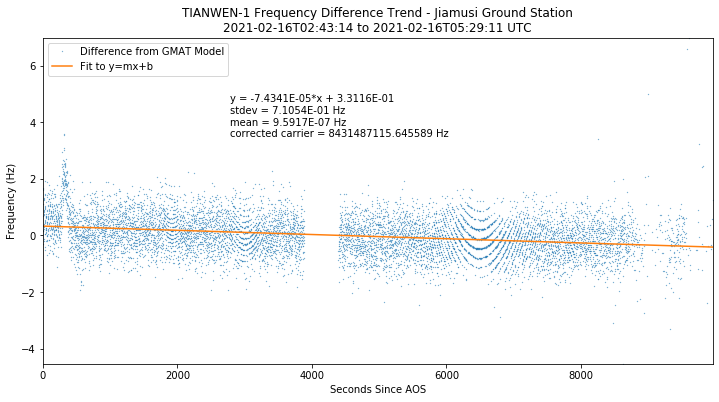

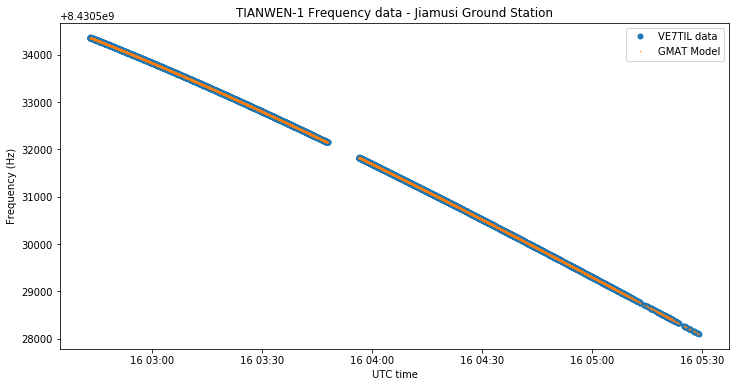

In [2]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-16_chn.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/chn_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/jiamusi_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Jiamusi Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/16_jiamusi_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Jiamusi Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/16_jiamusi_2.png')
plt.show();


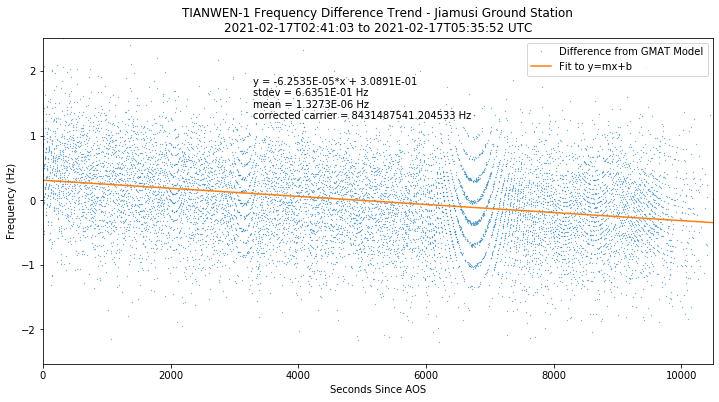

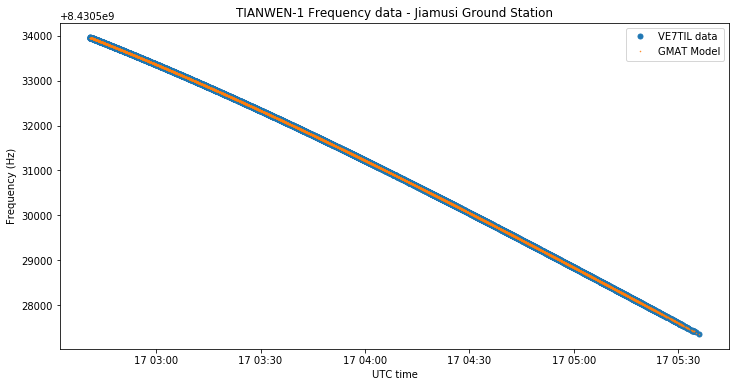

In [3]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-17_chn.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/chn_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/jiamusi_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Jiamusi Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/17_jiamusi_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Jiamusi Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/17_jiamusi_2.png')
plt.show();


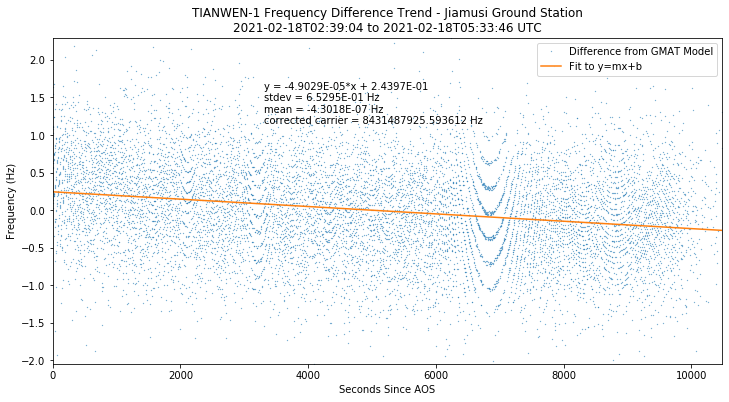

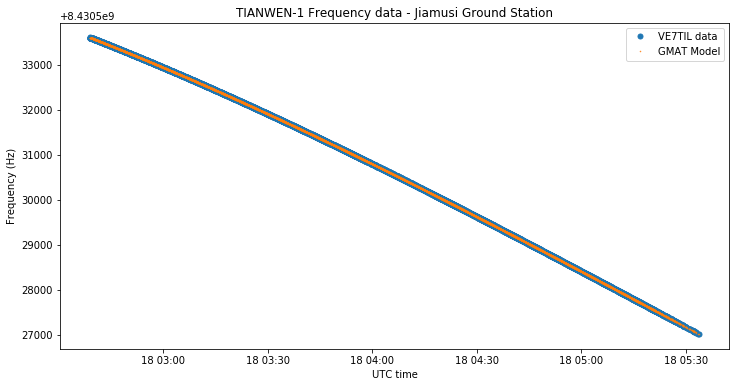

In [4]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-18_chn.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/chn_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/jiamusi_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Jiamusi Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/18_jiamusi_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Jiamusi Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/18_jiamusi_2.png')
plt.show();


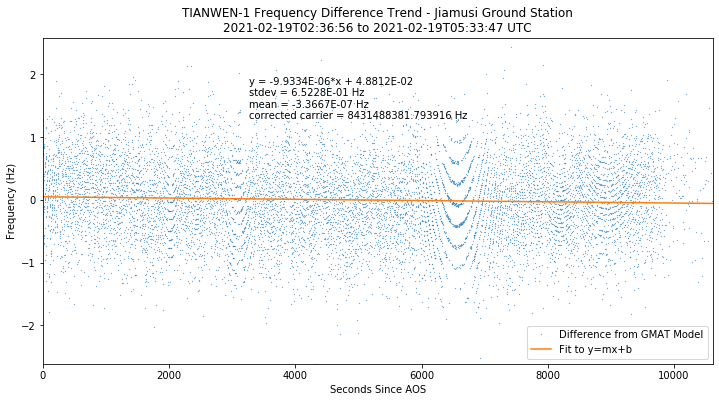

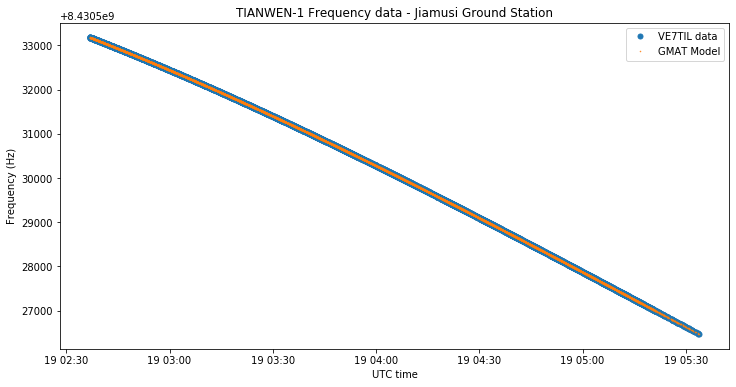

In [5]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-19_chn.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/chn_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/jiamusi_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Jiamusi Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/19_jiamusi_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Jiamusi Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/19_jiamusi_2.png')
plt.show();



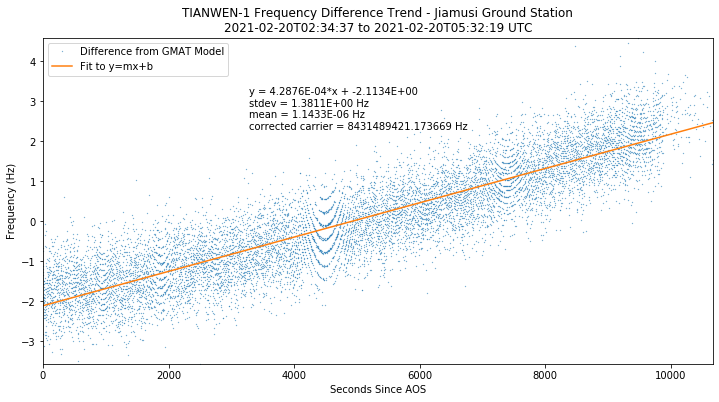

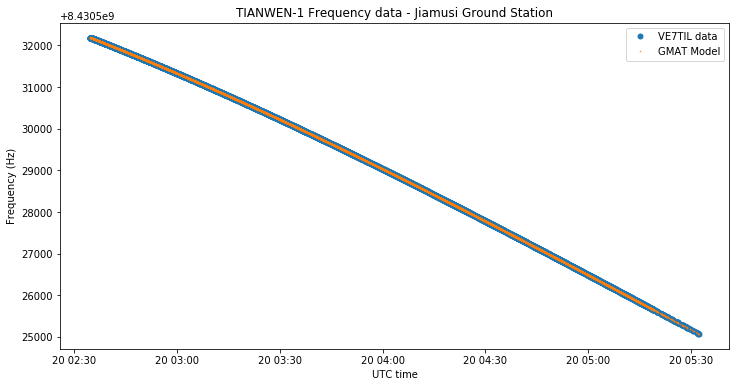

In [6]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-20_chn.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/chn_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/jiamusi_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Jiamusi Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/20_jiamusi_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Jiamusi Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/20_jiamusi_2.png')
plt.show();


-2.445345878601074 3.8976030349731445


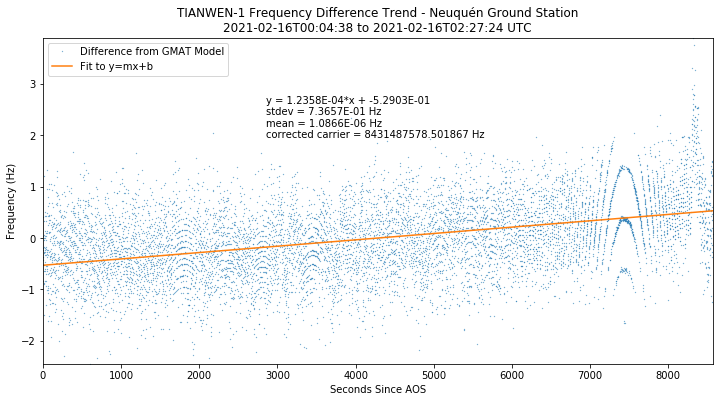

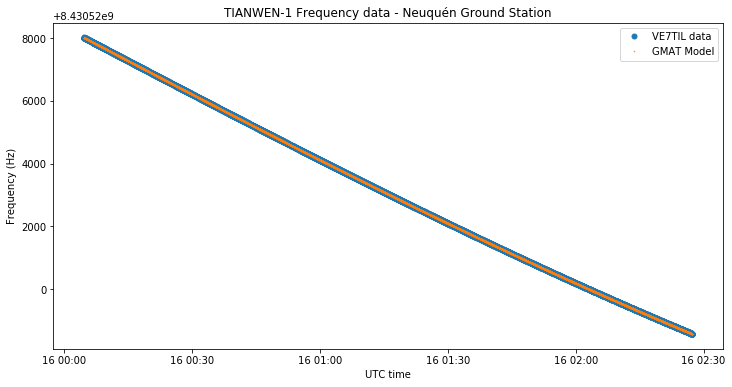

In [7]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-16_arg.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/arg_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/neuquen_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

print(np.min(np_diff), np.max(np_diff))

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Neuquén Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/16_neuquen_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Neuquén Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/16_neuquen_2.png')
plt.show();


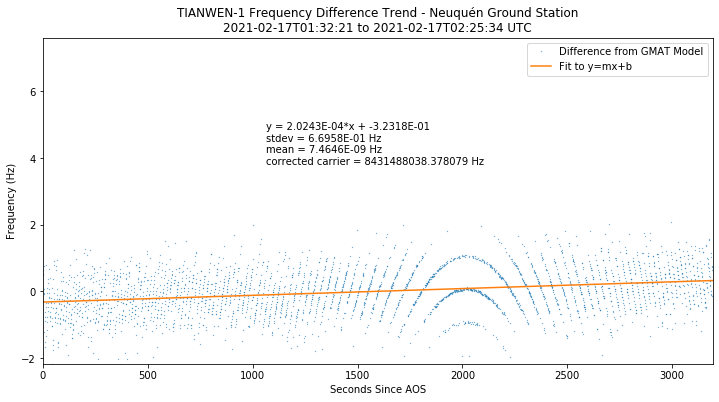

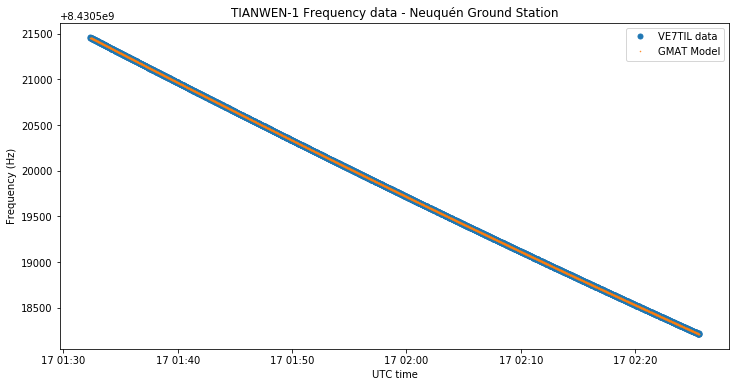

In [8]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-17_arg.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/arg_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/neuquen_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Neuquén Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/17_neuquen_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Neuquén Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/17_neuquen_2.png')
plt.show();


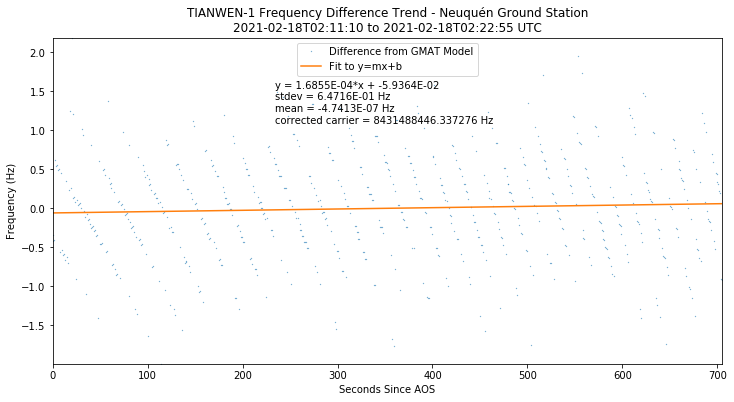

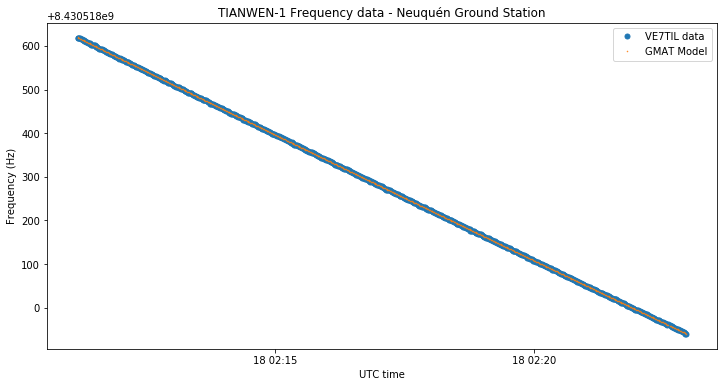

In [9]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-18_arg.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/arg_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  

        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/neuquen_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Neuquén Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/18_neuquen_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Neuquén Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/18_neuquen_2.png')
plt.show();


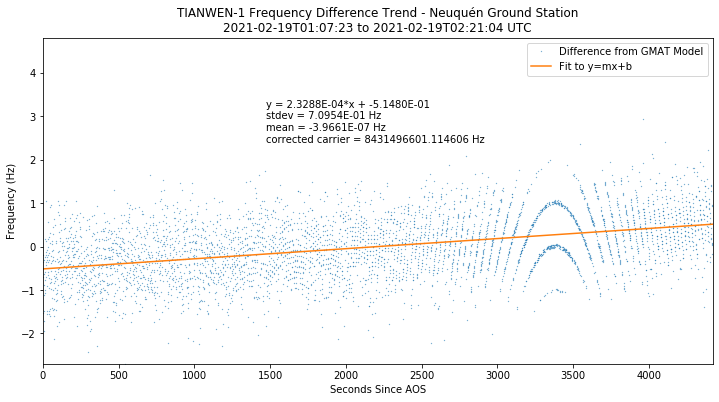

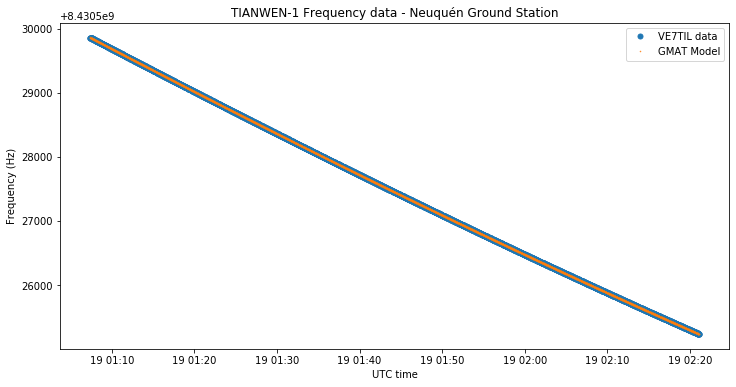

In [10]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-19_arg.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/arg_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
date = t_data.datetime[0].strftime('%Y-%m-%d')
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/neuquen_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Neuquén Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/19_neuquen_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Neuquén Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/19_neuquen_2.png')
plt.show();


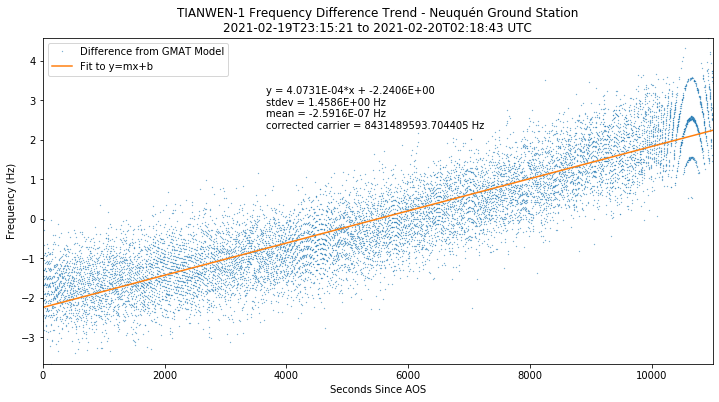

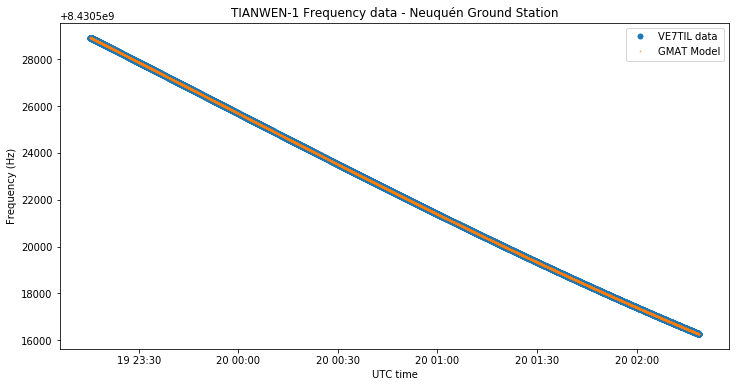

In [11]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-20_arg.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/arg_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
date = t_data.datetime[0].strftime('%Y-%m-%d')
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/neuquen_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Neuquén Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/20_neuquen_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Neuquén Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/20_neuquen_2.png')
plt.show();


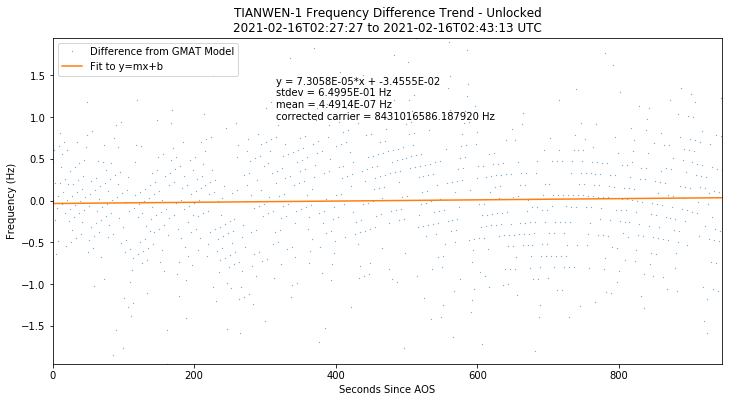

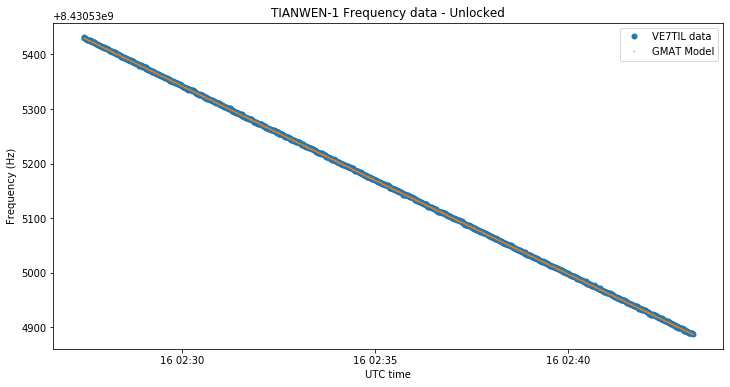

In [12]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-16_ul.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_orbit2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
date = t_data.datetime[0].strftime('%Y-%m-%d')
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/unlocked_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Unlocked\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()

plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/16_unlocked_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Unlocked')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/16_unlocked_2.png')
plt.show();


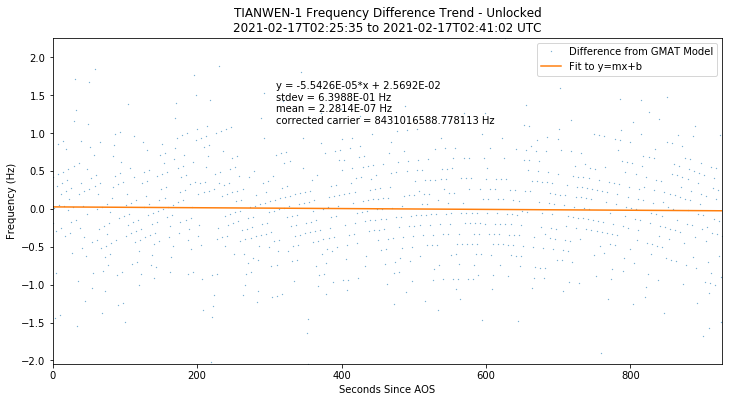

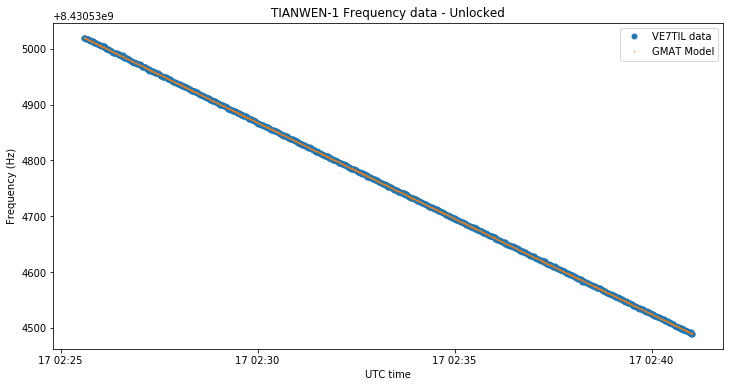

In [13]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-17_ul.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_orbit2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
date = t_data.datetime[0].strftime('%Y-%m-%d')
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/unlocked_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Unlocked\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()

plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/17_unlocked_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Unlocked')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/17_unlocked_2.png')
plt.show();


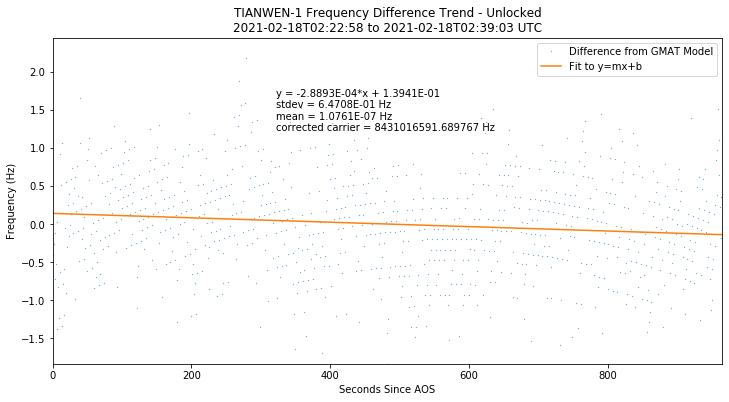

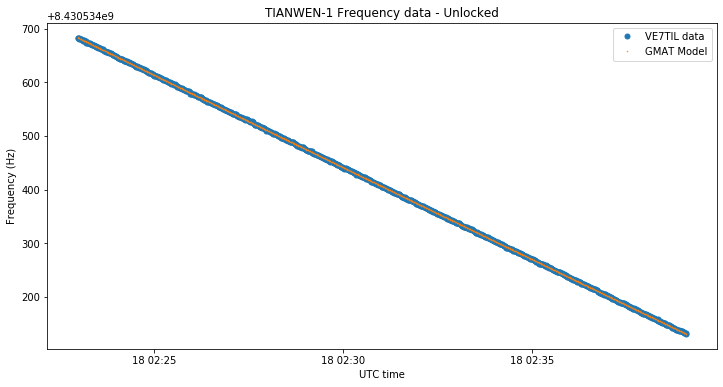

In [14]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-18_ul.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_orbit2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/unlocked_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Unlocked\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()

plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/18_unlocked_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Unlocked')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/18_unlocked_2.png')
plt.show();


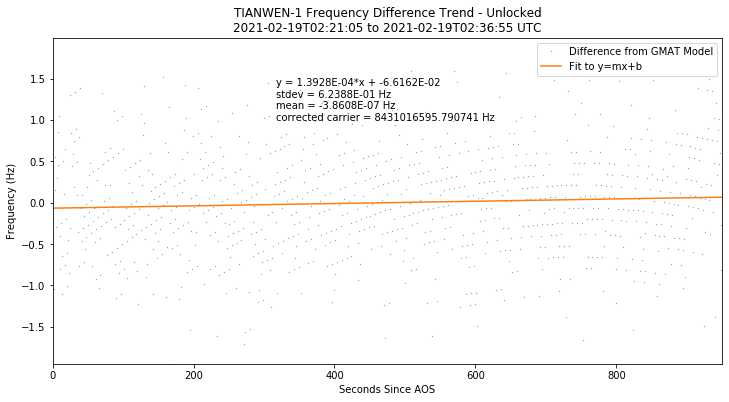

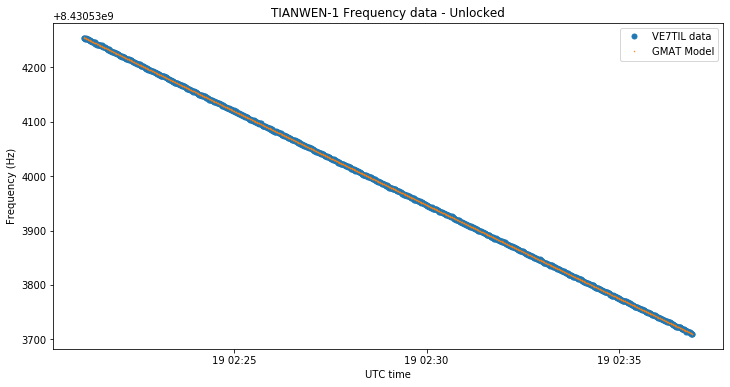

In [15]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-19_ul.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_orbit2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/unlocked_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Unlocked\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()

plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/19_unlocked_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Unlocked')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/19_unlocked_2.png')
plt.show();


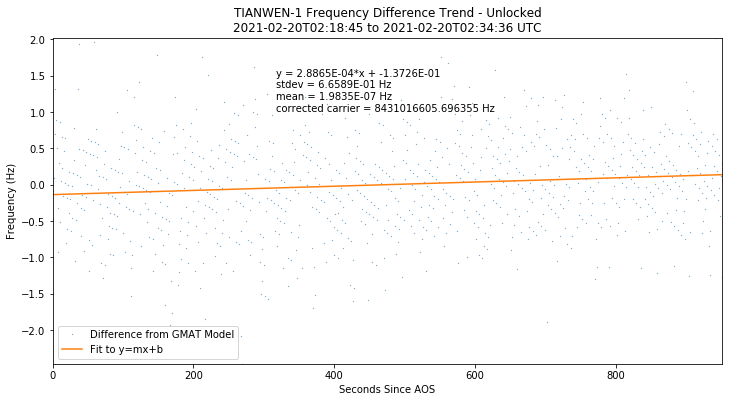

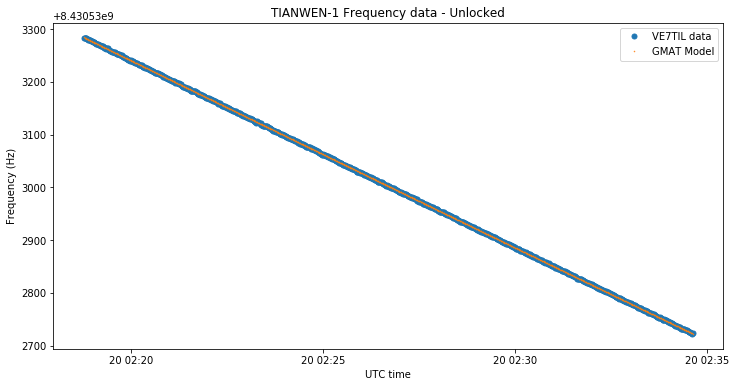

In [16]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_2021-02-20_ul.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_orbit2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
        
f = open('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/unlocked_daily.dat', 'a')
f.write('%s,%s,%s,%s,%s,%s\n' % (t_data.datetime[0], corrected_carrier, np.std(np_diff), np.mean(np_diff), m, b))
f.close()

plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(len(freq_diff)/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Unlocked\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()

plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/20_unlocked_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Unlocked')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/20_unlocked_2.png')
plt.show();


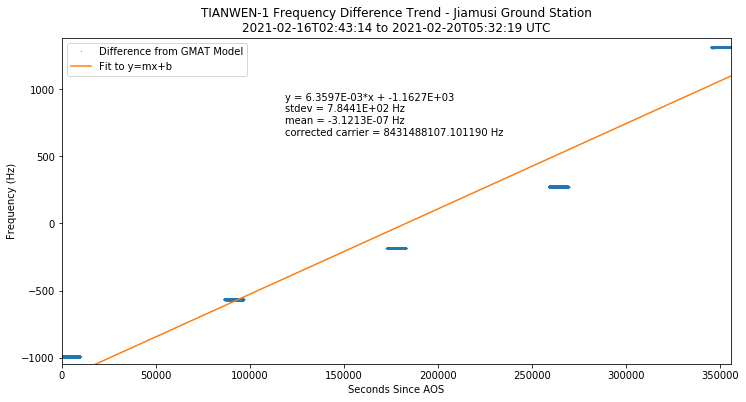

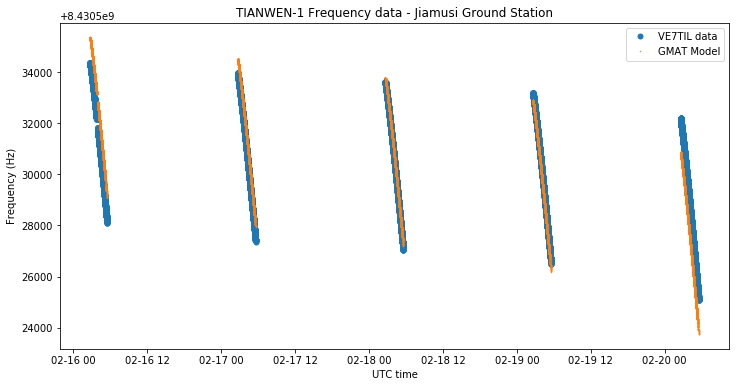

In [17]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_post_inc_chn.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/chn_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  


plt.ylim(np.min(np_diff)*1.05, np.max(np_diff)*1.05)
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text((np_t[len(np_t)-1])/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Jiamusi Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/summary_jiamusi_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Jiamusi Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/summary_jiamusi_2.png')
plt.show();


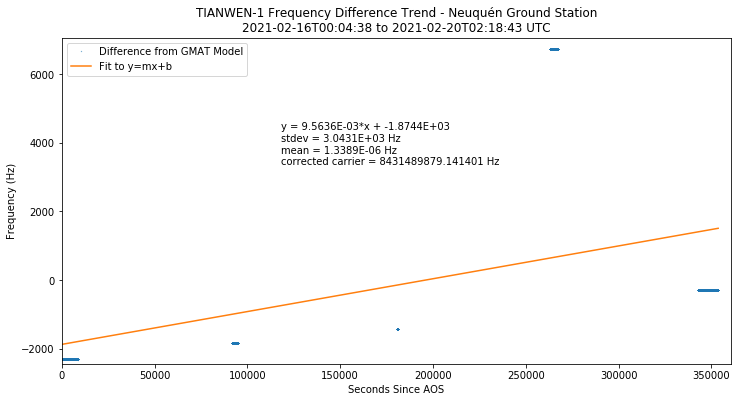

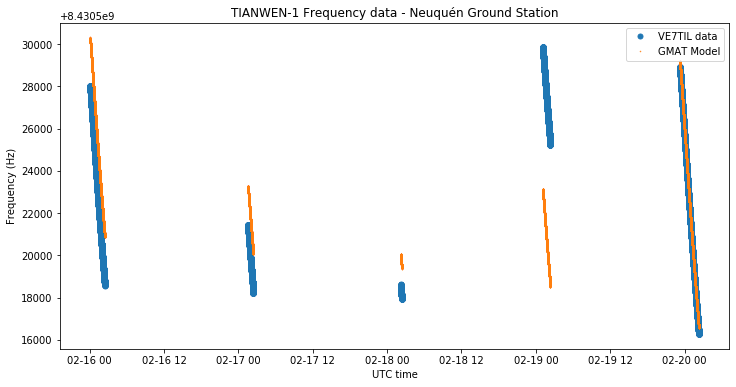

In [18]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_post_inc_arg.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/arg_ve7til_2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
              
plt.ylim(np.min(np_diff)*1.05, np.max(np_diff)*1.05)
plt.xlim(0,max(np_t)*1.02)
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text((np_t[len(np_t)-1])/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Neuquén Ground Station\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/summary_neuquen_1.png')
plt.show();

plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Neuquén Ground Station')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/summary_neuquen_2.png')
plt.show();


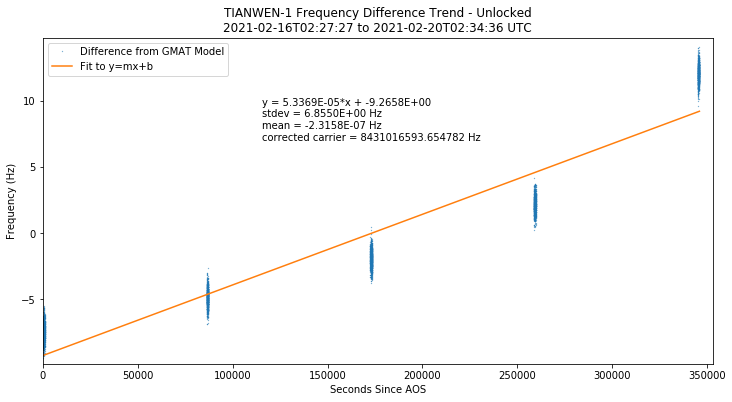

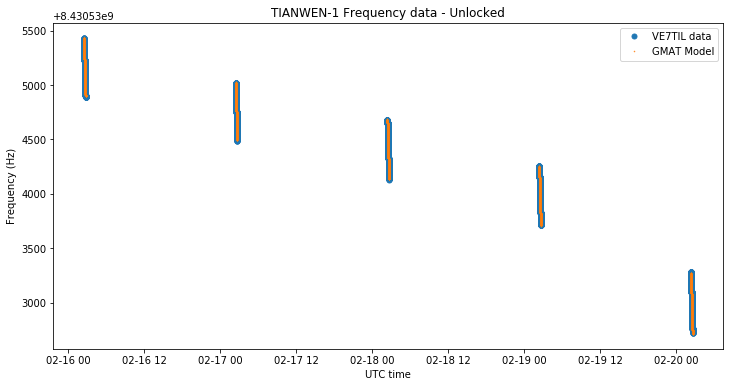

In [19]:
f_carrier = 1

data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/tw1_post_inc_ul.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_orbit2.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

#Create array of time since AOS

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

#Find corrected carrier

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

last_carrier = corrected_carrier

while True:
    freq_gmat = corrected_carrier * (1 - 1e3*rangerate_interp/c)
    freq_diff = freq_data - freq_gmat
    np_diff = np.array(freq_diff)
    m, b = np.polyfit(np_t, np_diff,1)
    corrected_carrier = last_carrier + np.mean(np_diff)
    diff_carrier = last_carrier - corrected_carrier
    last_carrier = corrected_carrier
    if diff_carrier < 0:
        diff_carrier = diff_carrier * -1
    if (diff_carrier < 0.000001):
        break  
        
plt.ylim(np.min(np_diff)*1.05, np.max(np_diff)*1.05)
plt.xlim(0,max(np_t)*1.02)
plt.plot(np_t, freq_diff, '.',markersize=.5, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text((np_t[len(np_t)-1])/3,((np.max(np_diff))-np.mean(np_diff))/2, 'y = %.4E*x + %.4E\nstdev = %.4E Hz\nmean = %.4E Hz\ncorrected carrier = %.6f Hz'%(m, b, np.std(np_diff), np.mean(np_diff), corrected_carrier))
plt.title('TIANWEN-1 Frequency Difference Trend - Unlocked\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%dT%H:%M:%S'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%dT%H:%M:%S UTC')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/summary_unlocked_1.png')
plt.show();


plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=2, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=1,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 Frequency data - Unlocked')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.savefig('/home/scott/Dropbox/satobs/tianwen1/orbit1/post_inc/summary_unlocked_2.png')
plt.show();
